## 1. Données et questions de l'énoncé.

1. Rapprocher l'export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).
L’export issu de la boutique en ligne contient le nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps.

En plus de ces 2 exports, on dispose d'un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU). 
la colonne id_web dans le fichier "liaison" correspond au SKU des produits dans le fichier "web" de la boutique en ligne.

2. Calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne. 

3. Vérifier la présence d'erreurs dans les prix des produits au travers d'une analyse  sur la variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Importation et traitement du fichier web.csv 

In [2]:
web=pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P5\\web.csv')

In [3]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [4]:
web.nunique()   # affiche le nombre de valeurs uniques par colonnes --> 4 colonnes avec 0 non-null
                                                                    # 12 colonnes avec 1 seule valeur    

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [5]:
web=web.dropna(axis='columns',how='all')   #supprime les 4 colonnes avec 0 non-null

In [6]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [7]:
web.describe() # 7 colonnes qui ne comportent que des 0 et des nan  peuvent être supprimées


,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,1430.000000,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,1.998601,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,0.037385,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0


In [8]:
web=web.drop(columns=['virtual','downloadable','rating_count','average_rating','post_parent','menu_order','comment_count'])  # suppression des 4 colonnes qui ne comportent que des 0


In [9]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                1428 non-null   object 
 1   total_sales        1430 non-null   float64
 2   tax_status         716 non-null    object 
 3   post_author        1430 non-null   float64
 4   post_date          1430 non-null   object 
 5   post_date_gmt      1430 non-null   object 
 6   post_title         1430 non-null   object 
 7   post_excerpt       716 non-null    object 
 8   post_status        1430 non-null   object 
 9   comment_status     1430 non-null   object 
 10  ping_status        1430 non-null   object 
 11  post_name          1430 non-null   object 
 12  post_modified      1430 non-null   object 
 13  post_modified_gmt  1430 non-null   object 
 14  guid               1430 non-null   object 
 15  post_type          1430 non-null   object 
 16  post_mime_type     714 n

In [10]:
web.groupby('post_name')['post_type'].unique()   # il y a 2 lignes par produit() post_name) .
                                                 # 1ere ligne avec post_type = product 
                                                 # 2eme ligne avec post_type = attachement (photo) 
                                                                    

post_name
8planeta-sicilia-etna-rosso-2018                               [product, attachment]
agnes-levet-amethyste-2017                                     [product, attachment]
agnes-levet-cote-rotie-maestria-2017                           [product, attachment]
agnes-levet-cote-rotie-peroline-2017                           [product, attachment]
alain-graillot-crozes-hermitage-blanc-2018                     [product, attachment]
                                                                       ...          
zind-humbrecht-pinot-gris-windsbuhl-2013                       [product, attachment]
zind-humbrecht-riesling-clos-windsbuhl-2014                    [product, attachment]
zind-humbrecht-riesling-gc-rangen-thann-clos-st-urbain-2017    [product, attachment]
zind-humbrecht-riesling-herrenweg-turckheim-2017               [product, attachment]
zind-humbrecht-vdf-zind-2017                                   [product, attachment]
Name: post_type, Length: 716, dtype: object

In [11]:
web=web.drop_duplicates(subset=['post_name'], keep='first')  # supprime les doublons et ne conserve que la 1ere ligne
web=web.dropna(axis=0, how='all')  # supprime les lignes ne contenant que des NAN

In [12]:
web.shape

(716, 17)

In [13]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                714 non-null    object 
 1   total_sales        716 non-null    float64
 2   tax_status         716 non-null    object 
 3   post_author        716 non-null    float64
 4   post_date          716 non-null    object 
 5   post_date_gmt      716 non-null    object 
 6   post_title         716 non-null    object 
 7   post_excerpt       716 non-null    object 
 8   post_status        716 non-null    object 
 9   comment_status     716 non-null    object 
 10  ping_status        716 non-null    object 
 11  post_name          716 non-null    object 
 12  post_modified      716 non-null    object 
 13  post_modified_gmt  716 non-null    object 
 14  guid               716 non-null    object 
 15  post_type          716 non-null    object 
 16  post_mime_type     0 non-n

In [14]:
web=web.drop(columns=['post_mime_type'])  # supprimer parce que ne contient que des nan
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                714 non-null    object 
 1   total_sales        716 non-null    float64
 2   tax_status         716 non-null    object 
 3   post_author        716 non-null    float64
 4   post_date          716 non-null    object 
 5   post_date_gmt      716 non-null    object 
 6   post_title         716 non-null    object 
 7   post_excerpt       716 non-null    object 
 8   post_status        716 non-null    object 
 9   comment_status     716 non-null    object 
 10  ping_status        716 non-null    object 
 11  post_name          716 non-null    object 
 12  post_modified      716 non-null    object 
 13  post_modified_gmt  716 non-null    object 
 14  guid               716 non-null    object 
 15  post_type          716 non-null    object 
dtypes: float64(2), object(14)


In [15]:
sku_missing=web.loc[web['sku'].isna()]  # affichage de 2 produits présents mais ne contenant pas de sku et donc pas de vente
sku_missing                             # une information à communiquer au client pour ajout des 'sku' manquants .

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa C�te R�tie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez s�duit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product


## 3. Importation et traitement du fichier erp.csv 

In [16]:
erp=pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P5\\erp.csv')

In [17]:
erp.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
dtypes: int64(3), object(2)
memory usage: 32.4+ KB


In [18]:
erp.nunique() 

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

In [19]:
erp['product_id']=erp['product_id'].astype("object")  # changer le type en object
erp['price']=erp['price'].str.replace(',', ".").astype(float)  # changer le type de price en float

In [20]:
erp.dtypes 

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [21]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [22]:
erp.duplicated().sum()  # compte le nombre de doublons

0

## 4. Importation et traitement du fichier liaison.csv 

In [23]:
liaison=pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P5\\liaison.csv')

In [24]:
liaison.info()   # on constate qu'ily a 91 valeurs manquantes dans la colonne id_web

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [25]:
liaison.head()   # la table donne une correspondance entre le product_id venant de erp et le id_web(ou sku) venant de la table web

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [26]:
liaison['product_id']=liaison['product_id'].astype("object")  # changer le type en object

In [27]:
liaison.rename(columns={'id_web': 'sku'}, inplace=True)  # renommer id_web en sku

In [28]:
liaison.dtypes 

product_id    object
sku           object
dtype: object

## 5. Jointure des tables issues de différentes sources

In [29]:
erp_liaison = erp.merge(liaison, on='product_id',how='outer')         # jointure du fichier erp et du fichier liaison
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [30]:
erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   sku             734 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 45.1+ KB


In [31]:
erp_liaison.nunique()   # afficher les valeurs uiques des différentes colonnes

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
sku               734
dtype: int64

In [32]:
erp_liaison_web=erp_liaison.merge(web,on="sku",how='outer') # jointure avec le fichier web

In [33]:
erp_liaison_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         916 non-null    object 
 1   onsale_web         916 non-null    int64  
 2   price              916 non-null    float64
 3   stock_quantity     916 non-null    int64  
 4   stock_status       916 non-null    object 
 5   sku                734 non-null    object 
 6   total_sales        896 non-null    float64
 7   tax_status         896 non-null    object 
 8   post_author        896 non-null    float64
 9   post_date          896 non-null    object 
 10  post_date_gmt      896 non-null    object 
 11  post_title         896 non-null    object 
 12  post_excerpt       896 non-null    object 
 13  post_status        896 non-null    object 
 14  comment_status     896 non-null    object 
 15  ping_status        896 non-null    object 
 16  post_name          896 non

In [34]:
erp_liaison_web.nunique()

product_id           825
onsale_web             2
price                381
stock_quantity       128
stock_status           2
sku                  734
total_sales           41
tax_status             1
post_author            2
post_date            716
post_date_gmt        716
post_title           713
post_excerpt         679
post_status            1
comment_status         1
ping_status            1
post_name            716
post_modified        589
post_modified_gmt    589
guid                 716
post_type              1
dtype: int64

In [35]:
erp_liaison_web.duplicated().sum()  # compte le nombre de doublons

0

In [36]:
# erp_liaison_web['price']=erp_liaison_web['price'].str.replace(',', ".").astype(float)  # changer le type de price en float

In [37]:
erp_liaison_web['vente_total']=erp_liaison_web['total_sales']*erp_liaison_web['price']   # calcul vente_total

In [38]:
erp_liaison_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,vente_total
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2.0,2018-02-08 12:58:52,...,"Il exhale un nez subtil, rac� avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2.0,2018-02-08 13:49:41,...,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2.0,2018-02-08 14:08:36,...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,taxable,2.0,2018-02-09 14:01:05,...,Gamine repr�sente tout le fruit� et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,taxable,2.0,2018-02-12 09:04:37,...,Le c�te r�tie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


## 6. Répartition des ventes par produit et calcul du chiffre d'affaire total .

In [39]:
CAN=erp_liaison_web['vente_total'].sum()  
print('le chiffre d\'affaire est de: ',CAN , ' euros')

le chiffre d'affaire est de:  70568.6  euros


In [40]:
#  remarques les bons d'achat ont le post_author == 1.0
nb_bon,bon_achat=erp_liaison_web.loc[erp_liaison_web['post_author'] == 1.0,('total_sales','vente_total')].sum()
print(f"{nb_bon:.0f} bons d\'achat ont été distribués pour un montant total de",bon_achat, ' euros')

10 bons d'achat ont été distribués pour un montant total de 250.0  euros


In [41]:

total_vente_produit=erp_liaison_web.loc[erp_liaison_web['post_author'] == 2.0,['product_id','post_name','vente_total']].groupby(['product_id','post_name']).sum()[['vente_total']].sort_values(['vente_total'], ascending=False)


In [42]:
total_vente_produit.head()  # affichage des produits par montant des ventes par ordre décroissant

,,vente_total
product_id,post_name,
4334,champagne-gosset-grand-blanc-de-blanc,4704.0
4144,champagne-gosset-grand-rose,4263.0
4402,cognac-frapin-vip-xo,2288.0
4142,champagne-gosset-grand-millesime-2006,1590.0
4141,gosset-champagne-grande-reserve,1560.0


## 7. Analyse des prix de vente.

In [43]:
erp['price'].describe()


count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [44]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.4+ KB


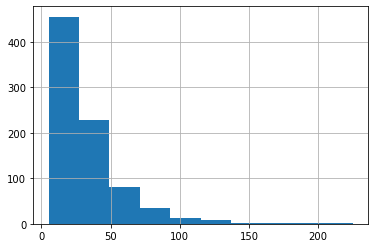

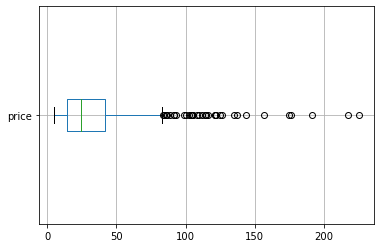

In [45]:
erp['price'].hist() # Crée l'histogramme
plt.show()
erp.boxplot(column="price", vert=False)  # crée la boîte à moustaches
plt.show()

In [46]:
##### déterminer les valeurs aberrantes



q1=erp["price"].quantile(q=0.25)          #On calcule Q1

q3=erp["price"].quantile(q=0.75)          #On calcule Q3     

IQR=q3-q1                                            #On calcule l'écart interquartile (IQR) 

borne_inf = q1-1.5*IQR                               #On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_sup = q3 +1.5*IQR                             #On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile 

# Les outliers sont les valeurs < à la borne inférieure ou > à la borne supérieure

outliers = erp.loc[(erp['price'] < borne_inf)|(erp['price'] > borne_sup)]


In [47]:
print('les produits dont le prix est > à',borne_sup ,'sont considérés d\'un point de vue mathématique comme des outliers.\
Cependant, il existe des différences importantes au niveau des prix qui sont justifiées par la qualité de certains produits.\
tels que des grands crûs et autres produits haut de gamme .') 


les produits dont le prix est > à 83.1 sont considérés d'un point de vue mathématique comme des outliers.Cependant, il existe des différences importantes au niveau des prix qui sont justifiées par la qualité de certains produits.tels que des grands crûs et autres produits haut de gamme .


In [48]:
prix_haut=outliers.sort_values(by="price", ascending=False)

In [49]:
id_prix_haut = prix_haut.merge(erp_liaison_web[['product_id','total_sales','vente_total','post_name']],on='product_id', how='inner')

In [50]:
id_prix_haut=id_prix_haut.dropna()

In [51]:
id_prix_haut.count()


product_id        41
onsale_web        41
price             41
stock_quantity    41
stock_status      41
total_sales       41
vente_total       41
post_name         41
dtype: int64

In [52]:
id_prix_haut.sort_values(by="price", ascending=False).head()

,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,vente_total,post_name
0,4352,1,225.0,0,outofstock,5.0,1125.0,champagne-egly-ouriet-grand-cru-millesime-2008
1,5001,1,217.5,20,instock,0.0,0.0,david-duband-charmes-chambertin-grand-cru-2014
2,5892,1,191.3,10,instock,3.0,573.9,coteaux-champenois-egly-ouriet-ambonnay-rouge-...
3,4402,1,176.0,8,instock,13.0,2288.0,cognac-frapin-vip-xo
4,5767,1,175.0,12,instock,0.0,0.0,camille-giroud-clos-de-vougeot-2016
